<a href="https://colab.research.google.com/github/shetehm/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Individual_Colab_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Contributor: Harshavardhan M. Shete**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [48]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Importing the dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering- Harshavardhan Shete/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding='unicode_escape')

## **Exploratory Data Analysis**

In [4]:
netflix_df.shape

(7787, 12)

In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1414,Movie,Nightflyers,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
#Checking for duplicate records
len(netflix_df[netflix_df.duplicated()])

0

All records are unique, there are no duplicate records.

## **Handling Missing Values**

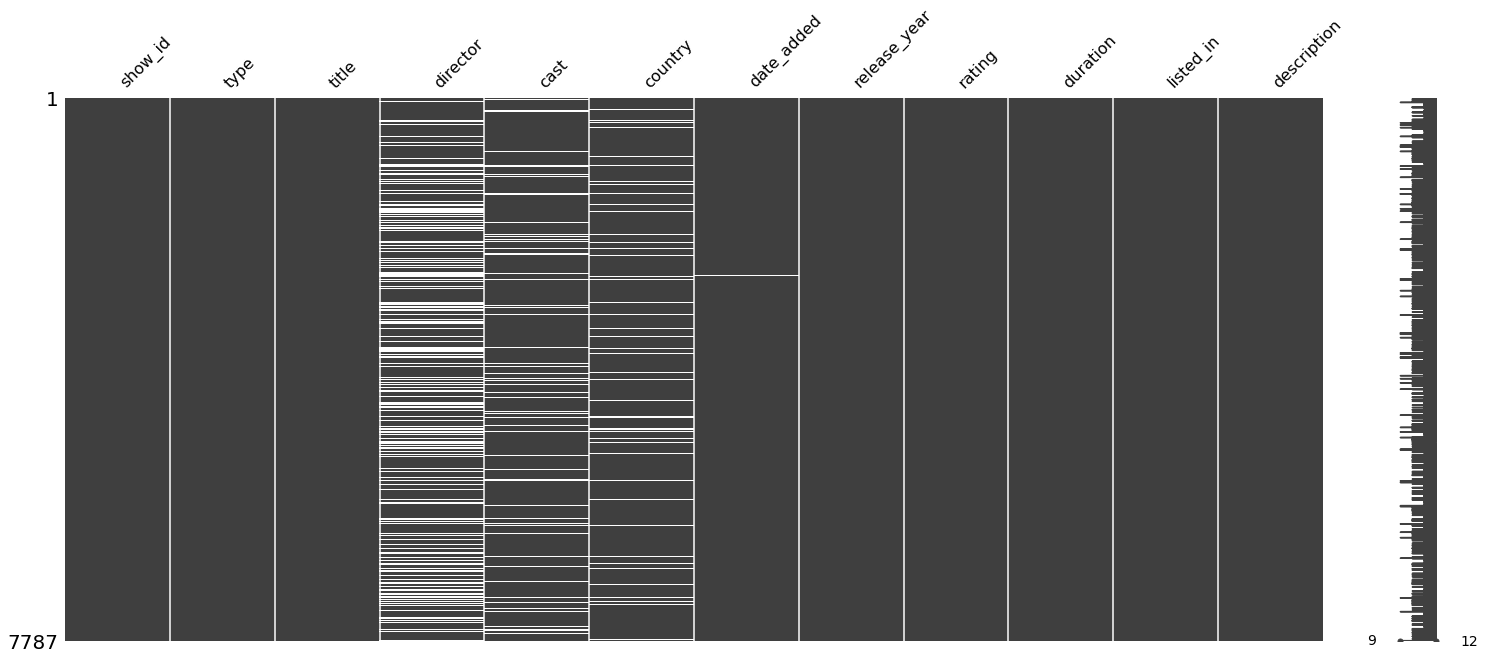

In [12]:
# heat matrix for missing values
import missingno as msno
fig = msno.matrix(netflix_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

Horizontal lines in the bar of respective variable shows the presence of missing values. Director, Cast, Country and Date Added columns have presence of missing values.

In [13]:
#Calculating the percentage of NULL of values in each column
total = netflix_df.isnull().sum().sort_values(ascending=False)
percent = (netflix_df.isnull().sum()/netflix_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


Director column has 30.6% missing values, we cannot miss on all these records. Cast and country column also has significant number of missing values whereas the date_added and rating column has negligible number of miising values.

In [51]:
#Replaing missing values in 'director' column with value 'unknown'
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'cast' column with value 'unknown'
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'country' column with mode
netflix_df['country']= netflix_df['country'].fillna(netflix_df['country'].mode()[0])


#Replaing missing values in 'rating' column with value most frequent rating i.e. mode
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

There is no logical way to handle null values in 'date' column and the null values are very negligible, thus dropping them.

In [52]:
# Dropping the null values
netflix_df.dropna(inplace=True)

In [53]:
#Calculating the percentage of NULL of values in each column after handling null values
total = netflix_df.isnull().sum().sort_values(ascending=False)
percent = (netflix_df.isnull().sum()/netflix_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
description,0,0.0
listed_in,0,0.0
duration,0,0.0
rating,0,0.0
release_year,0,0.0
date_added,0,0.0
country,0,0.0
cast,0,0.0
director,0,0.0
title,0,0.0


In [55]:
netflix_df.shape

(7770, 12)

After handling missing values, there are 7770 rows available in the dataset

# **Exploratory Data Analysis**

In [17]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [18]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

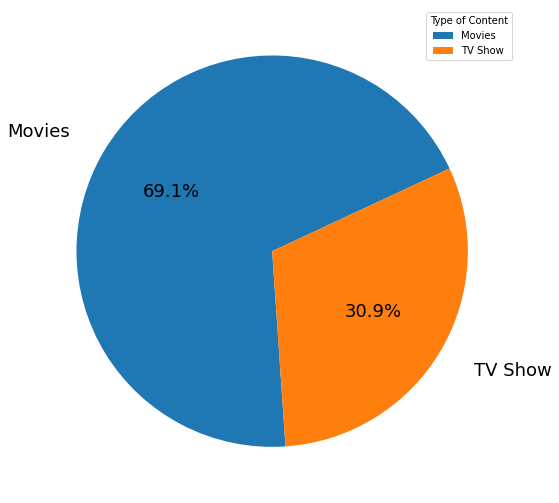

In [25]:
#Visualization: Type of Content
my_labels = ['Movies','TV Show']
my_explode = [0.2,0]
my_colors = ['green','red']
sizes = netflix_df['type'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels, labeldistance = 1.2,autopct='%1.1f%%', startangle = 25, textprops={'fontsize': 18} )
plt.legend(title = 'Type of Content')
plt.show()

In [26]:
netflix_df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'unknown', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada

There are multiple valued in the country coluns for each record. Considering the first value in the list as a country of origin.

In [56]:
#Creating a new feature 'origin_Country'
netflix_df['origin_Country']= netflix_df['country'].apply(lambda x: x.split(",")[0])

In [57]:
netflix_df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin_Country
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,United States
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India


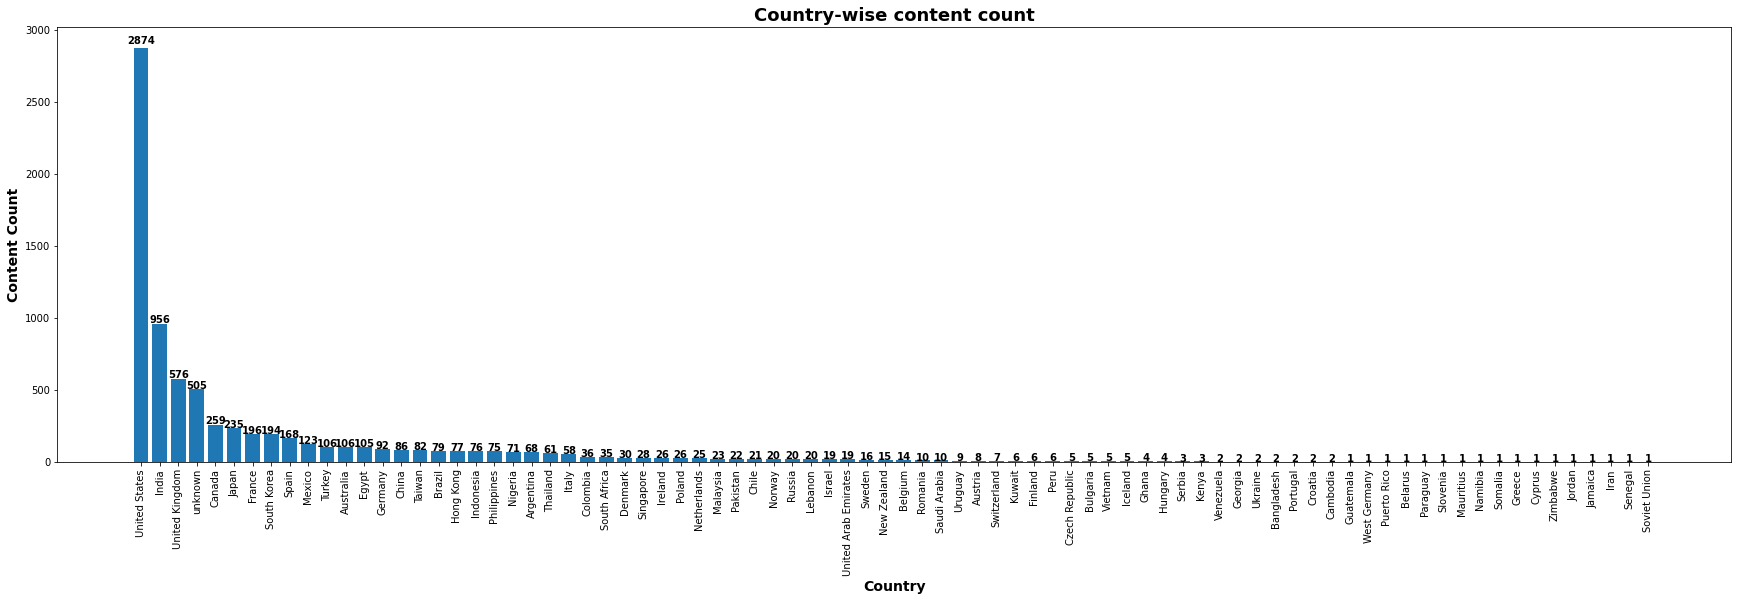

In [60]:
#Visualization: Country-wise content count
data= netflix_df.groupby('origin_Country')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(30,8))
graph = plt.bar(data['origin_Country'], data['show_id'])

plt.title('Country-wise content count', weight='bold', fontsize= 18)
plt.xlabel('Country', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['origin_Country'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

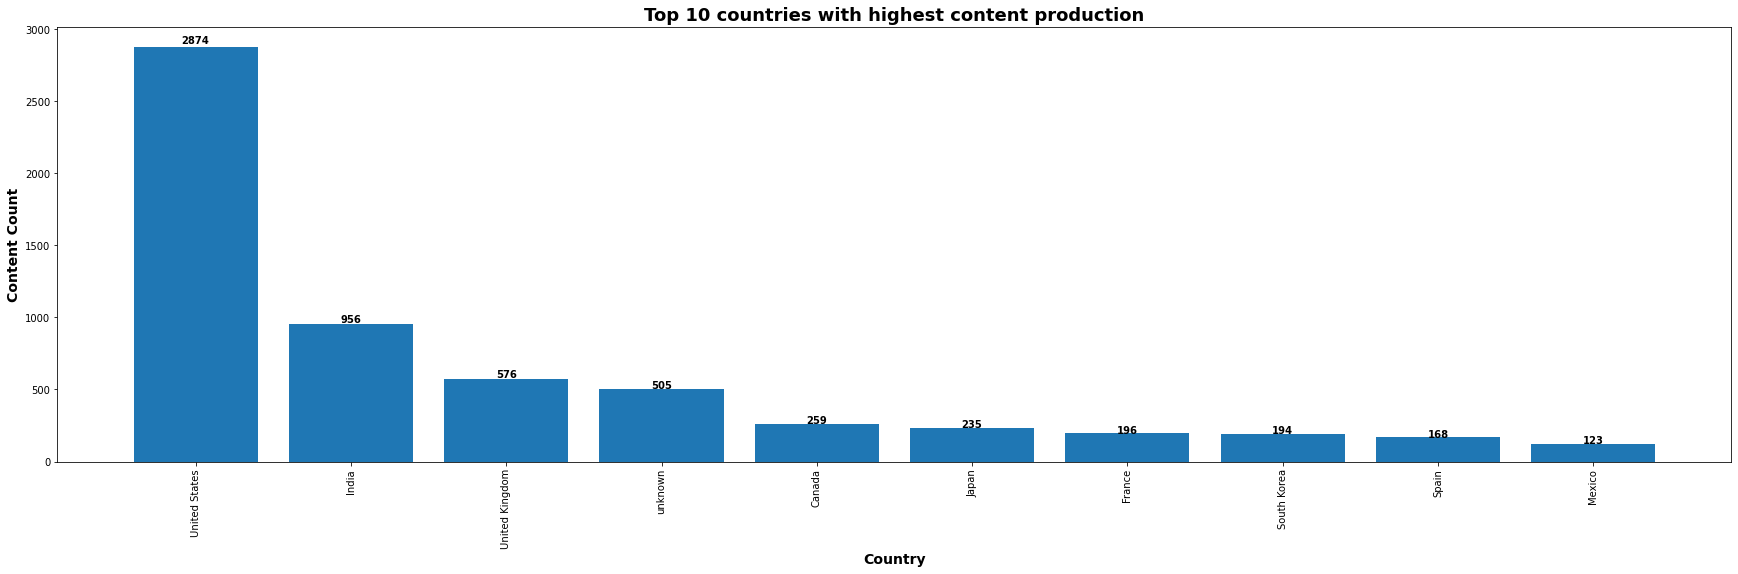

In [61]:
#Visualization: Top 10 countries with highest content production
data= netflix_df.groupby('origin_Country')['show_id'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(30,8))
graph = plt.bar(data['origin_Country'], data['show_id'])

plt.title('Top 10 countries with highest content production', weight='bold', fontsize= 18)
plt.xlabel('Country', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['origin_Country'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1